In [0]:
import pandas as pd

data = pd.read_csv('bbb.csv', encoding='euc-kr')

In [0]:
    #csv를 지번코드로 인덱스해보자
indices = pd.Series(data.index, index = data['지번코드']).drop_duplicates()
    # index 앞과 뒤를 봐보자
indices.head()
indices.tail()

    #scv를 유사도 계산할때 필요한 부분만 잘라보자
#sliceData = data.iloc[:,26:50]
sliceData = data.iloc[:,2:26]

In [0]:
from sklearn.decomposition import PCA
import numpy as np
pca = PCA(n_components = 2)
X2D = pca.fit_transform(sliceData)
X2D

array([[386.08041237, -25.7550849 ],
       [428.56803769, -28.09248213],
       [184.44199635, -10.23562681],
       ...,
       [ -7.93627931,   0.51966701],
       [ -8.6383594 ,   0.74458523],
       [ -8.20248876,   0.60820676]])

In [0]:
X2D.shape

(16686, 2)

In [0]:
print(pca.explained_variance_ratio_)

[0.94920899 0.04463744]


In [0]:
pca = PCA() #주성분 개수 지정하지 않고 클래스생성
pca.fit(sliceData)  #주성분 분석
cumsum = np.cumsum(pca.explained_variance_ratio_) #분산의 설명량을 누적합
num_d = np.argmax(cumsum >= 0.95) + 1 # 분산의 설명량이 95%이상 되는 차원의 수

In [0]:
num_d

1

In [0]:
pca = PCA(n_components=0.95) #95%이상의 분산을 설명력을 갖는 차원축소
new_d = pca.fit_transform(sliceData)

#pd.DataFrame(new_d)

,0
0,386.080412
1,428.568038
2,184.441996
3,400.555990
4,199.094055
...,...
16681,-8.371120
16682,-8.482143
16683,-7.936279
16684,-8.638359


In [0]:
matrix=np.matrix(X2D)
matrix

matrix([[386.08041237, -25.7550849 ],
        [428.56803769, -28.09248213],
        [184.44199635, -10.23562681],
        ...,
        [ -7.93627931,   0.51966701],
        [ -8.6383594 ,   0.74458523],
        [ -8.20248876,   0.60820676]])

0 -1
-1 1337
0 15349


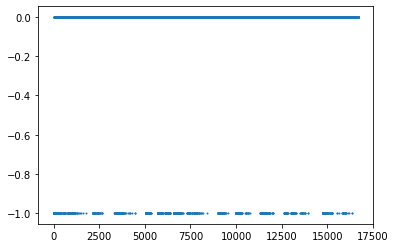

In [0]:
matrix=np.matrix(X2D)
matrix
#DBSCAN 클러스터
import numpy as np
from sklearn.cluster import SpectralClustering
from sklearn.cluster import DBSCAN

ret = DBSCAN(min_samples=20).fit_predict(matrix)

# 클러스터 번호 최소와 최대 저장
MAX=ret.max(); MIN = ret.min()
print(MAX, MIN)
# 각 클러스터들에 얼마나 있는지 세기
t=np.array(ret.shape)
n=t[0]
for i in range(MIN,MAX+1):
  a = (ret==i).sum()
  if a!=0 and a>50:
    print("%d %d"%(i,a))
    
# 클러스터 그림으로 확인하기
#클러스터 확인하기
import matplotlib.pyplot as plt
plt.scatter(range(0,n),ret,s=1)

3 -1
-1 705
0 15888


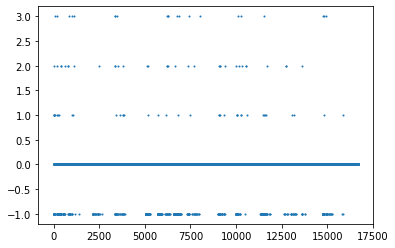

In [0]:
pca = PCA(n_components=0.95) #95%이상의 분산을 설명력을 갖는 차원축소
new_d = pca.fit_transform(sliceData)

#pd.DataFrame(new_d)
matrix=np.matrix(new_d)
#DBSCAN 클러스터
import numpy as np
from sklearn.cluster import SpectralClustering
from sklearn.cluster import DBSCAN

ret = DBSCAN(min_samples=20).fit_predict(matrix)

# 클러스터 번호 최소와 최대 저장
MAX=ret.max(); MIN = ret.min()
print(MAX, MIN)
# 각 클러스터들에 얼마나 있는지 세기
t=np.array(ret.shape)
n=t[0]
for i in range(MIN,MAX+1):
  a = (ret==i).sum()
  if a!=0 and a>50:
    print("%d %d"%(i,a))
    
# 클러스터 그림으로 확인하기
#클러스터 확인하기
import matplotlib.pyplot as plt
plt.scatter(range(0,n),ret,s=1)